# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведём исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Загружаем файл с данными и изучиаем общую информацию

Импортируем библиотеку pandas, выводим датафрейм на экран, выгружаем общую информацию и строим гистограммы для всех числовых столбцов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

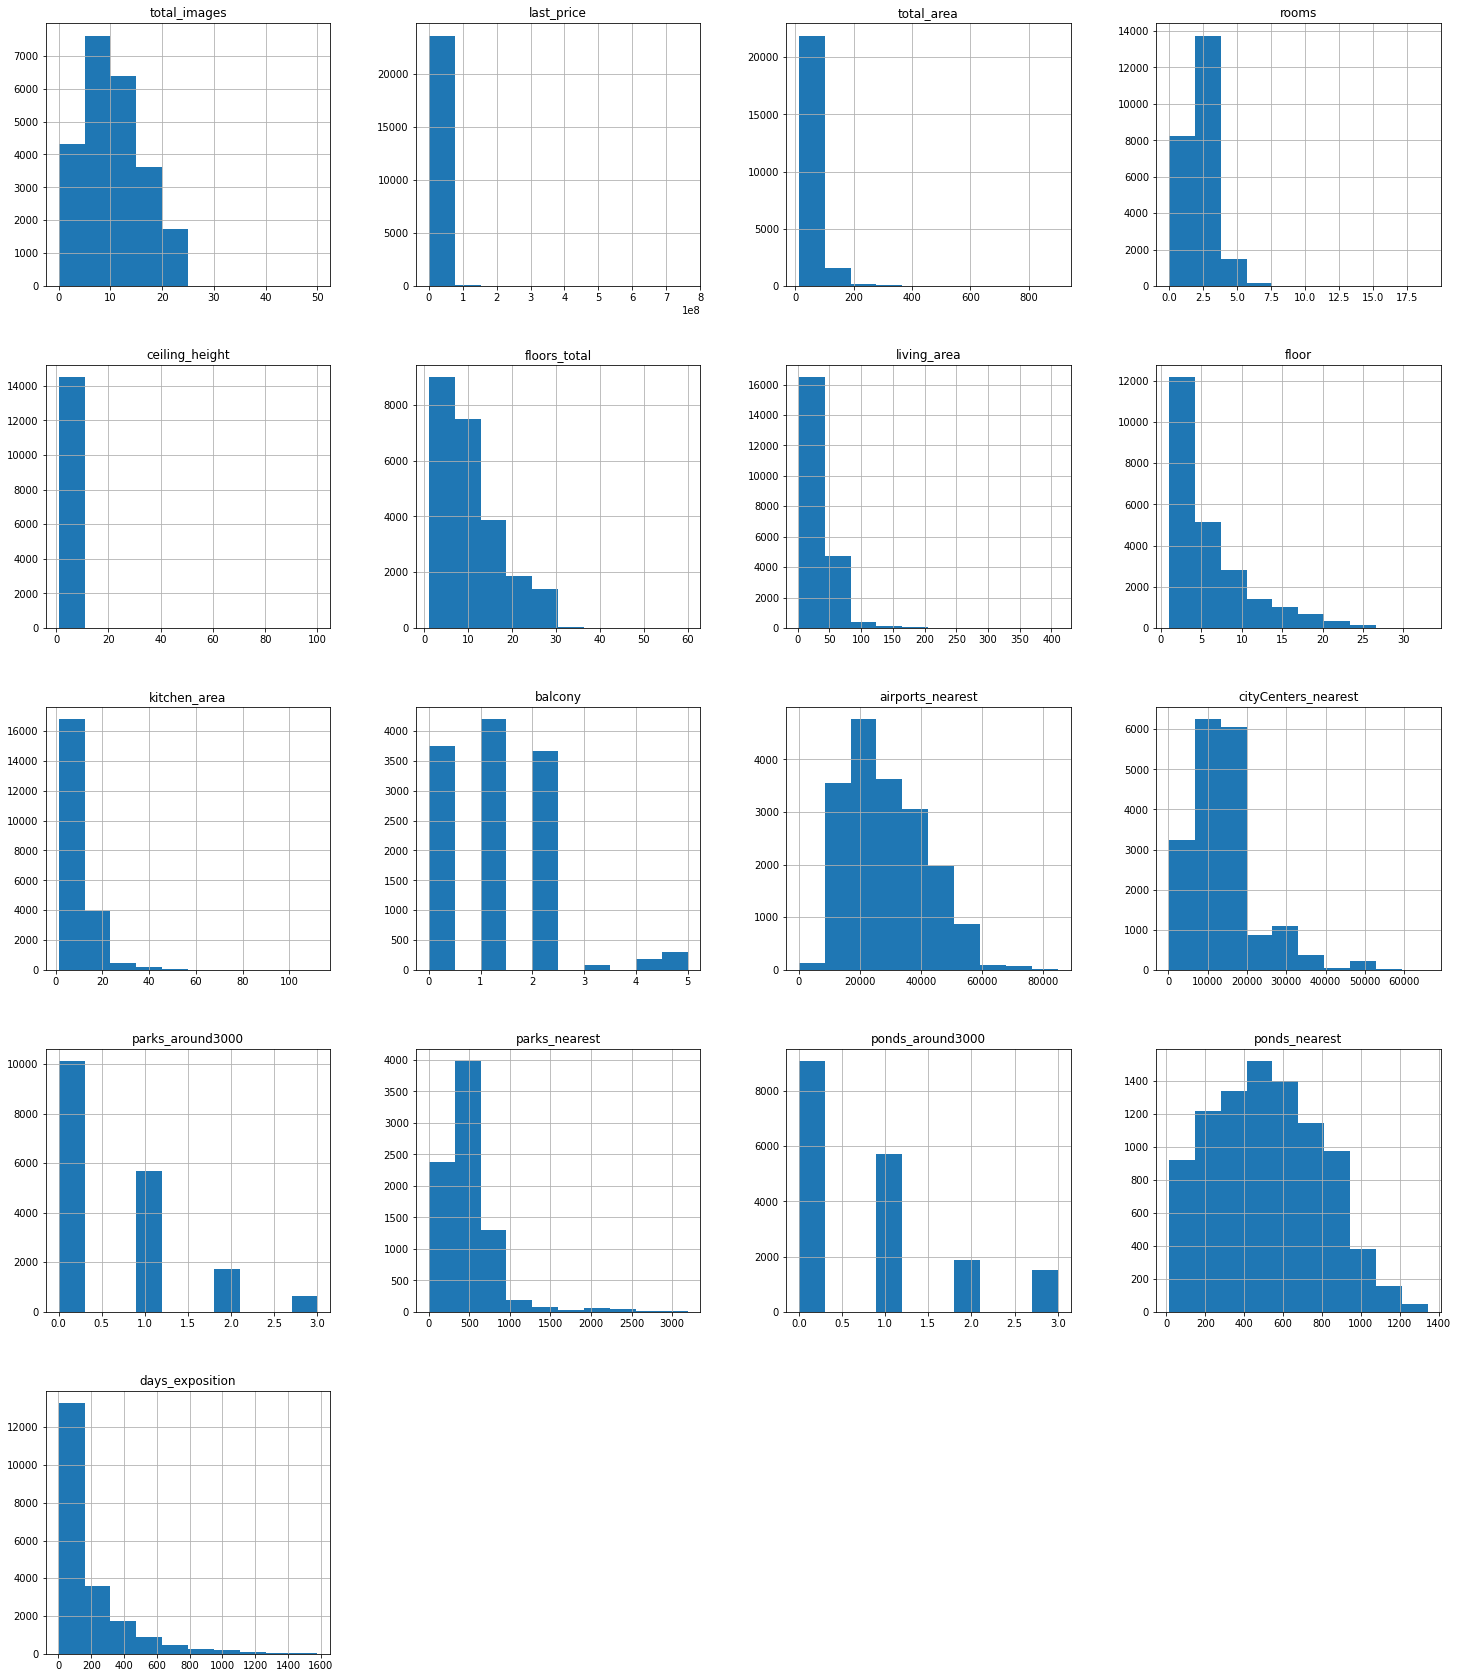

In [5]:
data.hist(figsize=(25, 30))
plt.show()

## Предобработка данных

   **2.1 Работа с пропусками**

Выведим количество пропущенных значений для каждого столбца.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Больше всего пропусков в столбце `'is_apartment'`. Пропуски появились вследствие того, что пользователи не вносили информацию по этому вопросу. Соответсвенно, можно предположить, что места пропусков это не апартаменты. 

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(value='False') 

В столбце `'balcony'` можно предположить аналогичную ситуацию, пропуски `Nan`появились из-за того, что пользователи не заполняли данные о количестве балконов. Можно предположить, если нет информации о количестве балконов, значит балконов нет вовсе и можно заменить `Nan` на `0`. 

In [8]:
data['balcony'] = data['balcony'].fillna(value=0) 

Пропуски в столбце `'ceiling_height'` возможны по причине того, что польльзователь не заполнил эти данные или по причине ошибки при выгрузке данных.
Прежде чем заполнять пропуски в столбце `'ceiling_height'` проверим какие данные там присутсвуют.

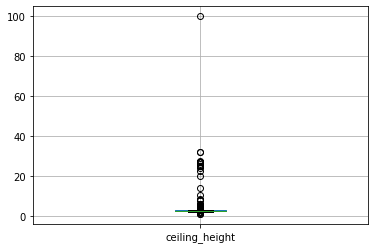

In [9]:
data.boxplot(column='ceiling_height')
plt.show()

По Диаграмме размаха видим, что основная масса значений состредоточена в районе 2-4 метров. Но также присутсвуют выбросы.
Выведем "не реальные" значения высоты потолков.

In [10]:
data_unreal_ceiling_height = data[(data['ceiling_height'] > 4.5) | (data['ceiling_height'] < 2.5)]
data_unreal_ceiling_height['ceiling_height'].unique()

array([  2.47,   2.34,  25.  ,   5.2 ,   2.  ,   2.45,   2.46,   5.3 ,
         5.  ,   4.7 ,   2.4 ,   5.6 ,   2.3 ,   2.48,   4.8 ,  32.  ,
         8.  ,  27.  ,  24.  ,  26.  ,   1.2 ,   8.3 ,   5.5 ,   4.65,
         2.2 ,  14.  ,   1.75,  20.  ,   2.25,   6.  ,  22.6 ,   5.8 ,
        27.5 ,   2.49,   4.9 ,  10.3 ,   1.  , 100.  ])

Проанализировав "не реальные" значения высоты потолков, делаем вывод, что часть из них это опечатки пользоватей. Для сохранения большего объема исходных данных принимаем, что:
32 это 3,2;
27 это 2,7;
26 это 2,6;
27,5 это 2,75.

Создадим фунцкию `def ceiling_height_replace` и применим ее к столбцу `ceiling_height`

In [11]:
def ceiling_height_replace(height):
    if height == 32:
        return 3.2
    if height == 27:
        return 2.7
    if height == 26:
        return 2.6
    if height == 27.5:
        return 2.75
    else:
        return height

In [12]:
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_replace)

Проверим сколько "не реальных" значений высоты потолка осталось в датафрейме.

In [13]:
data_unreal_ceiling_height = data[(data['ceiling_height'] > 4.5) | (data['ceiling_height'] < 2.5)]
data_unreal_ceiling_height

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
193,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9.0,55.9,9,False,...,9.8,1.0,Санкт-Петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,False,...,NaN,0.0,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,False,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
552,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,False,...,6.5,0.0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22960,17,2300000.0,53.6,2018-10-18T00:00:00,2,2.00,2.0,19.0,1,False,...,10.0,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23121,20,4290000.0,35.2,2018-09-12T00:00:00,1,2.47,14.0,20.0,7,False,...,7.8,1.0,Санкт-Петербург,7900.0,13142.0,1.0,506.0,0.0,NaN,41.0
23496,7,3300000.0,55.3,2018-06-19T00:00:00,2,2.45,14.0,31.0,2,False,...,8.4,3.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,62.0


Всего 103 записи (менее 1% данных). Исключим их из датафрема. 

In [14]:
data = data.drop(data[(data['ceiling_height'] <= 2.5) & (data['ceiling_height'] >= 4.5)].index)


Повторно выведим количество пропущенных значений для каждого столбца.

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Остальные пропущенные значения могли появиться из-за того, что пользователи не ввели данные, или из-за ошибки при выгрузке. Пропуски в данных по расстоянию до ближайших объектов могли получиться из-за ошибок расчёта геоданных. В реальных условиях следовало бы обратиться к разработчикам для устранения ошибок.

   **2.2 Работа с типами данных**

Повторно выведим информацию и датафрем.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [17]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Нужно изменить тип данных в столбце `'first_day_exposition'` c `object` на `datetime64`. 
Также следует поменять тип данных в столбце `'is_apartment'`  c `object` на `bool`.

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

In [19]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Проверяем результат.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [21]:
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

Проверка на дубликаты строк.

In [22]:
data.duplicated().sum()

0

Изменили тип данных в столбце `'first_day_exposition'` c `object` на `datetime64` для того чтобы возможно было выполнять операции со временем. 
Поменяли тип данных в столбце `'is_apartment'`  c `object` на `bool` Так как этот столбец подрузумевает под собой булевые значения.

Выводим уникальные значения столбца `'locality_name'`

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Для начала уберем букву `ё`.

In [24]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Создадим кастомную фукцию `remove_prefixes`, добавим в список все найденные префиксы, добавим в фунцию конструкцию try/except и удалим все префиксы с помощью метода apply.
Проверим, что получилось.

In [26]:
def remove_prefixes(text):
    prefixes = (['городской ', 'поселок городского типа ',
              'деревня ', 'садоводческое некоммерческое товарищество ',
              'поселок при железнодорожной станции ', 'село ',
                 'поселок ','садовое товарищество ','городского типа ',
                 'станции ', 'при железнодорожной станции ', 'при железнодорожной ',
                 'коттеджный ', 'имени '])
    
    for prefix in prefixes:
        try:
            text = text.replace(prefix, '')
        except:
            continue
    return text


data['locality_name'] = data['locality_name'].apply(remove_prefixes)


In [27]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

**2.3 Добавляем в таблицу новые столбцы**

Добавляем в таблицу столбцы: `Стоимость квадратного метра`, `день недели публикации объявления`, 
`месяц публикации объявления`, `год публикации объявления`

In [28]:
data['cost_per_sq_m'] = (data['last_price'] / data['total_area']).round(2)
data['day_of_the_ week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Создаем стобец в таблице `тип этажа квартиры (значения — «первый», «последний», «другой»)`. Для этого создаем кастомную функцию и применяем метод apply с аргументом axis=1.

In [29]:
def determining_the_type_of_floor(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last '
    else:
        return 'another'


In [30]:
data['type_of_apartment_floor'] = data.apply(determining_the_type_of_floor, axis=1)

Создаем стобец в таблице `расстояние до центра города в километрах`.

In [31]:
data['city_centers_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

Проверка:

In [32]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq_m,day_of_the_ week,month,year,type_of_apartment_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,another,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,another,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,another,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,another,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,another,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,another,10.0


Добавли в датафрем столбцы согласно заданию.

  
Была произведена предобработка данных.
    
    1. Были проанализированы пропуски в данных. В столбце `Апартаменты` пропуски было решено заменить на `False`, в столбце `Балконы` пропуски были заменены на 0.
    
    2. В столбце `Высота потолков` были проанализированны значения и проведены изменения, так 32 м стало 3,2 м, 27 м стало 2,7 26 м стола 2,6 и так далее. Удаляем строки со значением потолком ниже 2,5м и больше 4,5 м.
    
     3. Были изменены типы данных: в столбце `'first_day_exposition'` c `object` на `datetime64`,  в столбце `'is_apartment'`  c `object` на `bool` а также в столбце `'floors_total'`с `'float'` на `'int'`.
    
     4. Был исследован столбец `Населенный пункт`, проведено удаление неявных дубликатов. Так "поселок Рябово"  стал "Рябово", 'деревня Пудомяги' стала 'деревня Пудомяги' стала "Пудомяги" и т.д.
    
     5. Для дальнейших расчетов были добавлены столбцы: "стоимость квадратного метра",  "день выставления на продажу", "неделя выставления на продажу", "год выставления на продажу", добавлен столбец категориальных данных "тип этажа квартиры". Также был создан столбец "количество километров от центра города".


### Проведём исследовательский анализ данных

**4.1 Изучаем параметры и строим для них гистограммы**

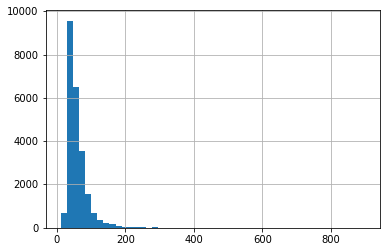

In [33]:
data['total_area'].hist(bins=50)
plt.show()

На гистограмме по столбцу `общая площадь квартиры` наблюдается пик в районе 35-50 м2. Также мы видим, что есть какие-то очень маленькие квартиры (примерно 20 м2) и имеется небольшое количество квратир с квадратурой более 200 м2. Можно изучить эти "аномалии" с помощью аргумента range.

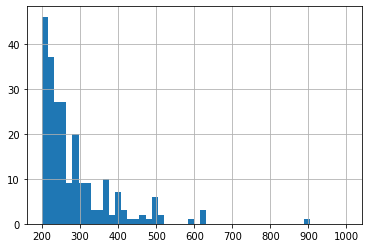

In [34]:
data['total_area'].hist(bins=50, range=(200, 1000))
plt.show()

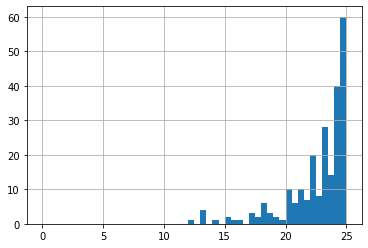

In [35]:
data['total_area'].hist(bins=50, range=(0, 25))
plt.show()

На этих гистограммах видно, что количество квартир более 400 м2 и менее 23 м2 совершенно небольшое. Выясним сколько это процентов от общего количества данных.

In [36]:
data[(data['total_area'] > 400) | (data['total_area'] < 23)]['total_area'].count()/23699*100

0.4683741930039242

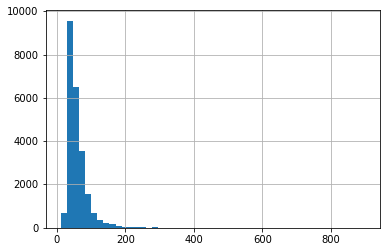

In [37]:
data['total_area'].hist(bins=50)
plt.show()

Учитывая, что это меньше полупроцента от всех данных, можно подчистить эти выбросы.

In [38]:
data = data[(data['total_area'] < 400) & (data['total_area'] > 23)]

In [39]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq_m,day_of_the_ week,month,year,type_of_apartment_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,another,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,another,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,another,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,another,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,another,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,another,10.0


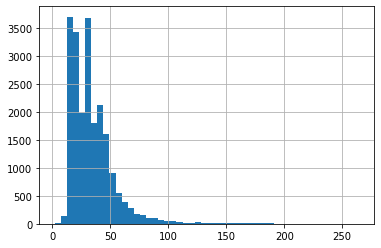

In [40]:
data['living_area'].hist(bins=50)
plt.show()

На гистограмме по столбцу `жилая площадь` наблюдаем два характерных пика, что может означать что мы имеем две группы квартир: небольшие(18-20 м2) и средние(~30 м2). По мере увеличения площади, график начинает стремиться к нулю. Видно, что в данных имеются квартиры с жилой площадью около 200 м2. Чтож, Питер - город коммуналок, возможно это и есть большие квартиры :) 

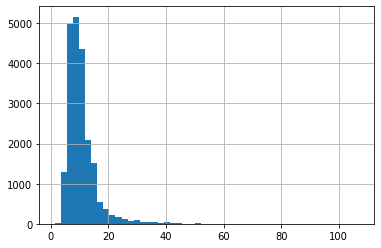

In [41]:
data['kitchen_area'].hist(bins=50)
plt.show()

На гистограмме по столбцу `площадь кухни` виден пик примерно на 10-12м2. Укрупним "хвост" гистограммы с помощью параметра range.

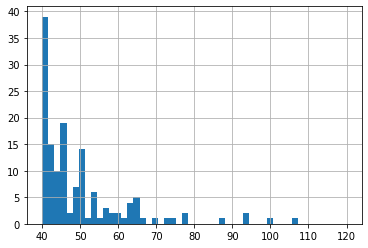

In [42]:
data['kitchen_area'].hist(bins=50, range=(40, 120))
plt.show()

Квартир с кухнями более 45 м2 очень мало и это похоже на выбросы. Поссчитаем, сколько это процентов от всех данных.

In [43]:
data[data['kitchen_area'] > 45]['kitchen_area'].count()/23699*100

0.2658340014346597

25 сотых процента. Удалим квартиры с кухнями более 45 м2.

In [44]:
data = data[(data['kitchen_area'] < 45) | (data['kitchen_area'].isnull())]

In [45]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq_m,day_of_the_ week,month,year,type_of_apartment_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,another,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,another,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,another,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,another,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,another,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,another,10.0


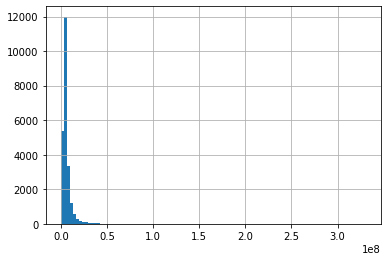

In [46]:
data['last_price'].hist(bins=100)
plt.show()

Слишком маленький масштаб. Укрупним с помощью параметра range, мосмотрим на маленькие и большие значения.

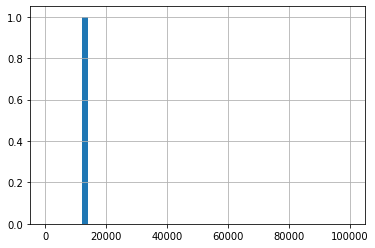

In [47]:
data['last_price'].hist(bins=50, range=(0, 100000))
plt.show()

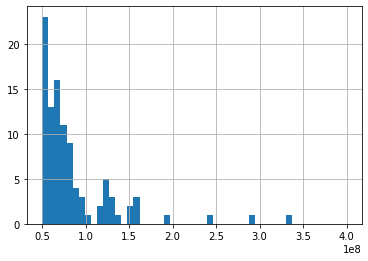

In [48]:
data['last_price'].hist(bins=50, range=(50*1000000, 400*1000000))
plt.show()

Значения менее 20 тыс руб и более 150 млн руб похожи на выбросы. Провериим сколько это процентов. Если менее 1%, то удалим их.

In [49]:
data[(data['last_price'] > 150*1000000) | (data['last_price'] < 20000)]['total_area'].count()/23699*100

0.03375669859487742

In [50]:
data = data[(data['last_price'] < 150*1000000) & (data['last_price'] > 20000)]

In [51]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq_m,day_of_the_ week,month,year,type_of_apartment_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,another,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,another,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,another,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,another,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,another,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,another,10.0


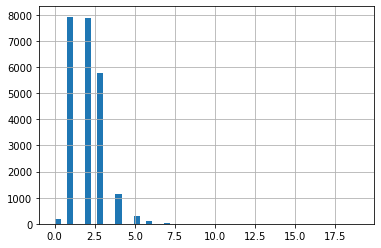

In [52]:
data['rooms'].hist(bins=50)
plt.show()

На гистограмме по столбцу `количество комнат` видно, что есть квартиры с количеством комнат 0, а также с комнатами больше 7.
Удалим эти выбросы, если их меньше 1% 

In [53]:
data[(data['rooms'] > 7) | (data['rooms'] == 0)]['total_area'].count()/23699*100

0.8101607662770581

In [54]:
data = data[(data['rooms'] < 7) & (data['rooms'] >= 1)]

In [55]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq_m,day_of_the_ week,month,year,type_of_apartment_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,another,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,another,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,another,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,another,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,another,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,another,10.0


In [56]:
data[data['ceiling_height'].isnull()]['ceiling_height'].count()

0

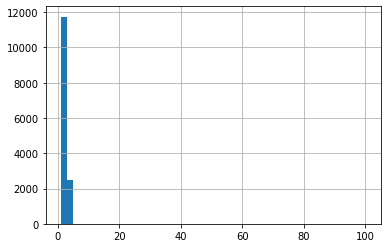

In [57]:
data['ceiling_height'].hist(bins=50)
plt.show()

На гистограмме по столбцу `Высота потолков` наблюдаем три пика 2,50, 2,75 и 3,0 метра. Видимо это типовые высоты потолков в жилых домах. Видно, что график стремится к нулю после 3,75 м. Проверим процент таких квартир и удалим эти выбросы.

In [58]:
data[data['ceiling_height'] > 3.75]['ceiling_height'].count()/23699*100

0.5949618127347145

In [59]:
data = data[(data['ceiling_height'] < 3.75) | (data['ceiling_height'].isnull())]

In [60]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq_m,day_of_the_ week,month,year,type_of_apartment_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,another,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,another,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,another,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,another,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,another,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,another,10.0


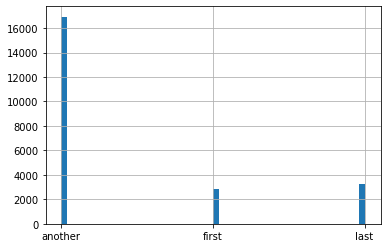

In [61]:
data['type_of_apartment_floor'].hist(bins=50)
plt.show()

На гистограмме по столбцу `тип этажа` видим правдоподобную ситуацию, что квартир на типе этаже "другой" продается больше чем на первом или последнем.

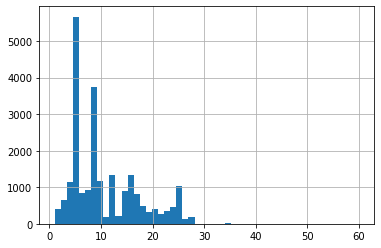

In [62]:
data['floors_total'].hist(bins=50)
plt.show()

На гистограмме по столбцу `количество этажей в доме` видим что больше всего квартир продается в пяти и девяти этажных домах. А также имеется 35-ти этажное здание.

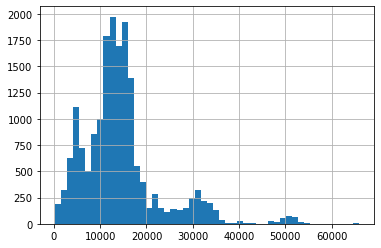

In [63]:
data['cityCenters_nearest'].hist(bins=50)
plt.show()

На гистограмме по столбцу `расстояние до центра города` видим что больше всего квартир продается в 10 км от центра города. Так есть небольшой пик на расстоянии около 4х км от города. Также есть аномальные значения > 50 км города. возможно это квартиры от получилось от того, что расстояния от квартир, продаваемых в Ленинградской области, считались до центра Сант-Петербурга. 
Посчитаем процент квартир с растоянием до центра более 55 км, и если их меньше процента, то удалим.

In [64]:
data[data['cityCenters_nearest'] > 55000]['cityCenters_nearest'].count()/23699*100

0.05063504789231613

In [65]:
data = data[(data['cityCenters_nearest'] <= 55000) | (data['cityCenters_nearest'].isnull())]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq_m,day_of_the_ week,month,year,type_of_apartment_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,another,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,another,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,another,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,another,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,another,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,another,10.0


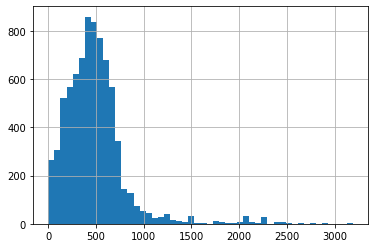

In [66]:
data['parks_nearest'].hist(bins=50)
plt.show()

На гистограмме по столбцу `расстояние до парка` видим что большинство квартир продается в пределах 500 метров до ближайшего парка. Посчитаем процент и удалим все что больше 2000 м.

In [67]:
data[data['parks_nearest'] > 2500]['parks_nearest'].count()/23699*100

0.06751339718975484

In [68]:
data = data[(data['parks_nearest'] <= 2500) | (data['parks_nearest'].isnull())]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq_m,day_of_the_ week,month,year,type_of_apartment_floor,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,another,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,another,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,another,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,another,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,another,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,another,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,NaN,NaN,NaN,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,173.0,3.0,196.0,602.0,149511.40,1,3,2017,another,10.0


**4.2 Анализ времени продажи квартир**

Построим гистограмму и найдем среднее арифметическое и медиану.

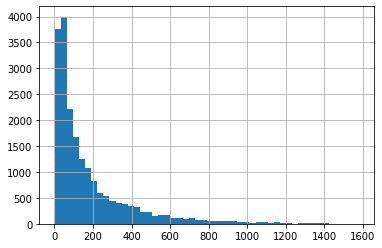

In [69]:
data['days_exposition'].hist(bins=50)
plt.show()

In [70]:
data['days_exposition'].describe() 
plt.show()

среднее арифметическое - 180,5
медиана - 96.
По этим данным можно сделать следующие выводы: 
В среднем продажа квартиры занимает 96 дней.
Быстрыми продажами можно считать, все что ниже 1го квартился, то есть быстрее 45 дней.
Необычайно долгими проджами можно считать более 800 дней. На графике в этом месте начинает стреится к нулю.

**4.3 Определяем факторы, которые сильне всего влияют на полную стоимость квартир.**

Строим диаграмму рассеяния и считаем коэфициент Коэффициент Пирсона для изучения зависимости цены от общей площади.

In [71]:
print(data['total_area'].corr(data['last_price']))
plt.show()

0.7341935109748409


In [72]:
print(data['total_area'].corr(data['last_price']))
plt.show()

0.7341935109748409


Строим диаграмму рассеяния и считаем коэфициент Коэффициент Пирсона для изучения зависимости цены от жилой площади.

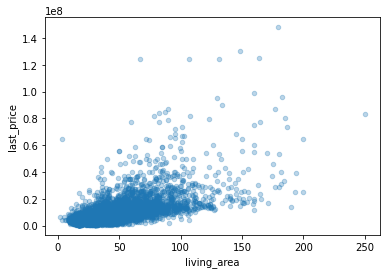

In [73]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3) 
plt.show()

In [74]:
print(data['living_area'].corr(data['last_price']))

0.647276314163072


Строим диаграмму рассеяния и считаем коэфициент Коэффициент Пирсона для изучения зависимости цены от площади кухни.

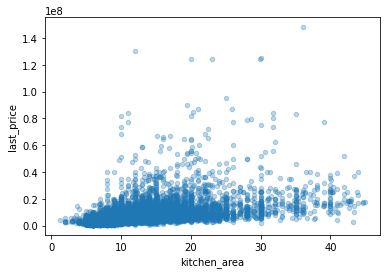

In [75]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3) 
plt.show()

In [76]:
print(data['kitchen_area'].corr(data['last_price']))

0.5277336941085389


Строим график зависимости цены от количества комнат для изучения зависимости цены от количества комнат. Для этого применяем свобдную таблицу и выисляем медиану цены.  

In [77]:
data_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')

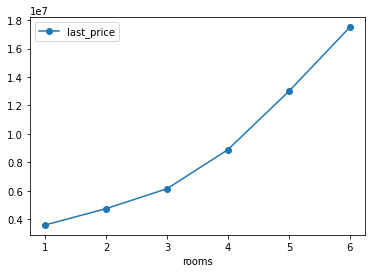

In [78]:
data_rooms.plot(y='last_price', style='o-')

plt.show()

Строим график зависимости цены от этажа, накотором находится квартирадля изучения зависимости цены от типа этажа.  Для этого применяем свобдную таблицу и выисляем медиану цены.  

In [79]:
data_floor = data.pivot_table(index='type_of_apartment_floor', values='last_price', aggfunc='median')

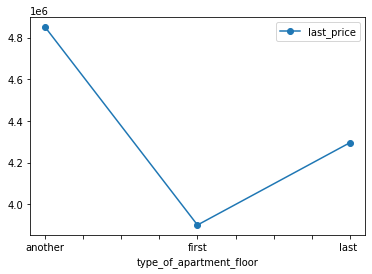

In [80]:
data_floor.plot(y='last_price', style='o-')

plt.show()

In [81]:
data_floor = data_floor.reset_index(drop=False)

In [82]:
data_floor['floor'] =  data_floor.index
print(data_floor['floor'].corr(data_floor['last_price']))

-0.5814680405156919


Цена от типа этажа зависит не линейно. Однако можем отметить, что квартире с типпом этажа "другой" стоят значительно дороже, чем квартиры на последнем этаже. а квартиры на первом этаже самые дешевые. 

Строим график зависимости цены от дня начала продажи и считаем коэфициент Коэффициент Пирсона для изучения зависимости цены от дня начала продажи. Всё делаем по аналогии с вычислениями по столбцу "количество комнат".

In [83]:
data_week_day = data.pivot_table(index='day_of_the_ week', values='last_price', aggfunc='median')
data_week_day

,last_price
day_of_the_ week,
0,4650000.0
1,4750000.0
2,4700000.0
3,4600000.0
4,4590000.0
5,4540000.0
6,4550000.0


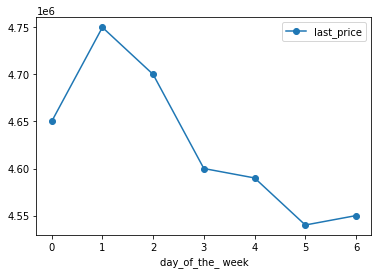

In [84]:
data_week_day.plot(y='last_price', style='o-')

plt.show()

In [85]:
data_week_day['week_day'] =  data_week_day.index
print(data_week_day['week_day'].corr(data_week_day['last_price']))

-0.8202157681061734


Зависимость не линейна. Есть пик во вторник, а дешевле всего квартриры выставляют в субботу и воскресенье.


Строим график зависимости цены от месяца начала продажи и считаем коэфициент Коэффициент Пирсона для изучения зависимости цены от месяца начала продажи. Всё делаем по аналогии с вычислениями по столбцу "количество комнат".

In [86]:
data_month = data.pivot_table(index='month', values='last_price', aggfunc='median')
data_month

,last_price
month,
1,4600000.0
2,4650000.0
3,4650000.0
4,4775000.0
5,4500000.0
6,4400000.0
7,4650000.0
8,4600000.0
9,4700000.0


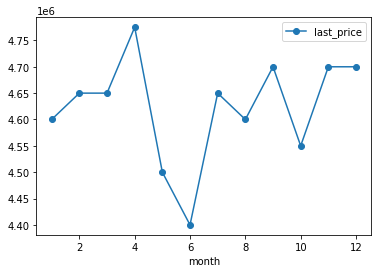

In [87]:
data_month.plot(y='last_price', style='o-')

plt.show()

In [88]:
data_month['month'] =  data_month.index
print(data_month['month'].corr(data_month['last_price']))

0.12675327902240374


Зависимость не линейна. Дороже всего квартиры выставляют на продажу в апреле, а дешевле всего в июне. Надо не забыть зайти на Циан в июне:)

Строим график зависимости цены от года продажи и считаем коэфициент Коэффициент Пирсона для изучения зависимости цены от года продажи. Всё делаем по аналогии с вычислениями по столбцу "количество комнат".

In [89]:
data_year = data.pivot_table(index='year', values='last_price', aggfunc='median')
data_year

,last_price
year,
2014,7640000.0
2015,5250000.0
2016,4500000.0
2017,4500000.0
2018,4590000.0
2019,5000000.0


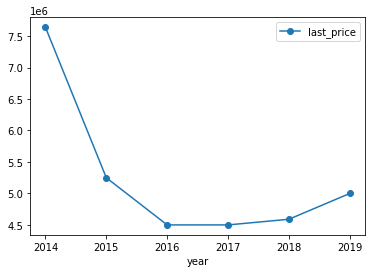

In [90]:
data_year.plot(y='last_price', style='o-')

plt.show()

In [91]:
data_year['year'] =  data_year.index
print(data_year['year'].corr(data_year['last_price']))

-0.6699135239788379


На графике наблюдаем резкое падение с 2014 по 2016 год. Потом начался рост цен на квартиры. Кореляция отрицательная.

Вывод: Сильнее всего на общую стоимость влияет количество комнат (кореляиця = 0,97). Даже у общей площади квартиры кореляция меньше (0,73). Также есть интересные наблюдения, что дешевле квартиры выставляют на продажу в выходные дни и в июне месяце. 

**4.3 Считаем среднюю стоимость квадратного метра в 10 населенных пунктах с наибольшим числом объявлений**

Простроим свобную таблицу pivot_table, сгрупируем по названию насленного пункта, применим агрегирующие функции count() и mean()

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [92]:
# Простроим свобную таблицу pivot_table, сгрупируем по названию насленного пункта, применим агрегирующие функции count() и mean()
data_mean_cost = data.pivot_table(index='locality_name', values='cost_per_sq_m', aggfunc=['mean', 'count'])

# Переименуем столбцы
data_mean_cost.columns = ['mean', 'count']

# Отсортируем по убыванию столбец count
data_mean_cost = data_mean_cost.sort_values(by='count', ascending=False)

# Оставим в датафрейме 10 населенных пунктов с наибольшим количеством объявлений
data_mean_cost = data_mean_cost[:10]

# Для определения населённых пунктов с максимальной и минимальной ценой отсортируем по столбцу mean
data_mean_cost = data_mean_cost.sort_values(by='mean', ascending=False).round()
data_mean_cost

,mean,count
locality_name,,
Санкт-Петербург,113029.0,15188
Пушкин,102641.0,359
Кудрово,94896.0,445
Парголово,90448.0,322
Мурино,85389.0,550
Шушары,78134.0,432
Колпино,75240.0,336
Гатчина,68811.0,305
Всеволожск,68589.0,387


Самые дорогие квартиры в Санкт-Петербурге (113 042 р/м2), самые дешевые в Выборге (57 969 р/м2).
Посчитаем среднюю стоимость квадратного метра во всех этих городах:

In [93]:
data_mean_cost['mean'].mean().round()

83505.0

**4.4 Анализ зависимости стоимости от расстояния до цента в г. Санкт_Петербург**

In [94]:
#Создаем датафрейм только по г. Санкт-Петербург, строим сводную таблицу зависимости 
#стоимости квадратного метра от расстояния до центра
data_spb_cost = (data.query('locality_name == "Санкт-Петербург"')
                 .pivot_table(index='city_centers_nearest_km', values='cost_per_sq_m', aggfunc='mean').round())

data_spb_cost

,cost_per_sq_m
city_centers_nearest_km,
0.0,205983.0
1.0,154917.0
2.0,150923.0
3.0,120965.0
4.0,129793.0
5.0,136659.0
6.0,145614.0
7.0,152988.0
8.0,123862.0


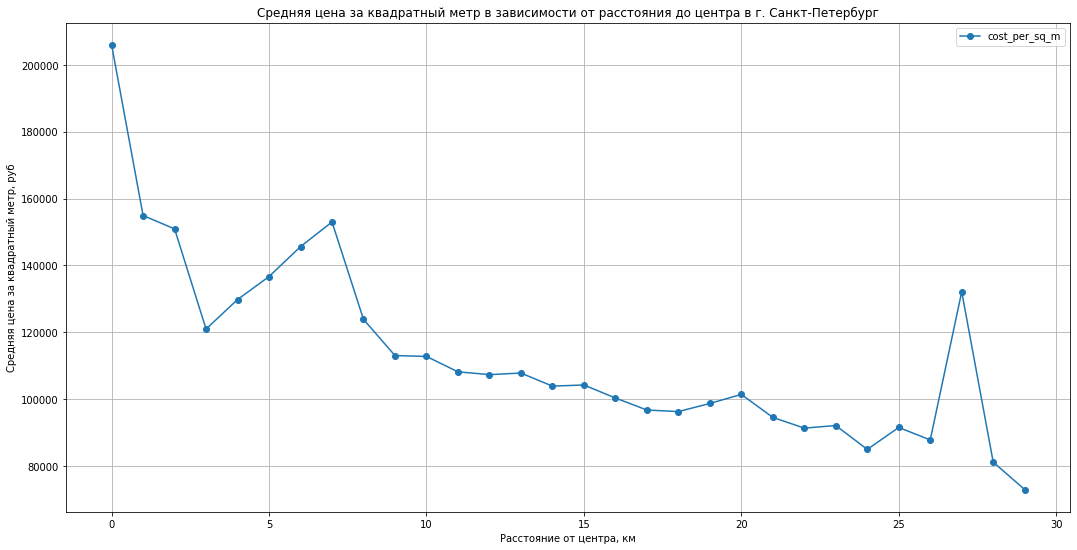

In [95]:
# Строим график зависимости по принципу бритвы Оккама
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='cost_per_sq_m', aggfunc='mean')
    .plot(grid=True, style='o-', figsize=(18, 9))
)

plt.ylabel('Средняя цена за квадратный метр, руб')
plt.xlabel('Расстояние от центра, км')
plt.title('Средняя цена за квадратный метр в зависимости от расстояния до центра в г. Санкт-Петербург')
plt.show()

На графике мы наблюдаем тенденцию падения цены по мере удаления продаваемых квартир от центра города.
Но имеются две особенности:
1. С 3-го по 7-й километр от центра цена начинает расти. Можно предположить, что на таком расстоянии от центра в Санкт-Петербурге находится элитное жильё или дома, представляющие культурное наследие.
2. На 27 км цена резко возрастает и потом также резко падает вниз. Можно предположить, что на таком расстояния находятся элитные таунхаусы с дорогими квартирами.

  
Проведен исследовательский анализ. 
    
    1. Построены гистограммы и изучены 10 параметров выставленных на продажу квартир. 
    Данные изучены и проанализированы, с помощью графиков выявлены аномальные значения и удалены из датафейма. 
    2. Проведен анализ времени продажи квартир. Выявлено, что в среднем продажа квартиры занимает 96 дней. Быстрыми продажами можно считать, все что ниже 1го квартился, то есть быстрее 45 дней. Необычайно долгими проджами можно считать более 800 дней.
    3. Посчитана средняя стоимость квадратного метра, выявлено что самые дорогие квартиры в Санкт-Петербурге, а самые дешевые в Выворге.
    4. Проведен анализ зависимости стоимости от удаленности от центра. Выявлено, что в имеется тренд, чем ближе к центру города, тем дороже квартиры, но имеются некоторые особенности.


**ОБЩИЙ ВЫВОД**   
    
**Предобработка данных:** 
    
* Был получен датасет по продаже недвижимости в Ленинградской области состоящий из 23699 строк и 22 столбцов. 
* В 14 столбцах имелись пропуски данных. 
* После проведенного анализа, в столбцах `Апартаменты` и `Балконы` были полностью заполнены пропуски значениями 0 и False. 
* В столбцах `'first_day_exposition'`,  `'is_apartment'`, `'floors_total'` были заменены типы данных, на соответсвующие этим столбцам значениям.
* Был проработан столбец `Населенный пункт`, из него уделены все неявные дубликаты. Так "поселок Рябово"  стал "Рябово", 'деревня Пудомяги' стала 'деревня Пудомяги' стала "Пудомяги" и т.д.
* Процент удаленных данных равнен 3,0%.
    
**Ответы на цели проекта:**
    
Целью проекта было установления параметров, влияющих на стоимость квартиры. 

Основными параметрами являются:
* Общая площадь;
* Жилая площадь;
* Количество комнат;
* Удаленность от центра;     
* Тип этажа квартиры

Параметры не оказывающие большого влияния на стоимость:
* Площадь кухни;  
* День и месяц выставления квартры на продажу.
    
Также при помощи анализа графиков выявлены типичные характеристики квартиры:
    
* Общая площадь квартиры: от 30 м2 до 80 м2
* Жилая площадь квартиры: от 15 м2 до 50 м2
* Площадь кухни: от 5 м2 до 12 м2
* Количество комнат: от 1 до 4
* Высота потолков: от 2,5 м до 3,0 м
* Больше колчество квартир продается в 5 и 9 этажных домах
* Расстояние от центра города от 2 км до 17 км    
* Расстояние до парка от 200 м до 700 м

По стоимости квартир: 
    
* Стоимость квартир вариурется от 1 500 000 р до 8 000 000 р 

Но на стоимость квадратного метра сильно влияет город, в котором она продается. Самый дорогой город Санкт-Петербург (средняя стоимость квадратного метра - 113 029 р), самый дешевый из 10 городов с наибольшим количеством объявлений - Выборг (средняя стоимость квадратного метра - 57 873 р)

Топ-3 самых высоких цен квадратного метра жилья в Ленинградской области:    
* Санкт-Петербург - 113 029 р    
* Пушкин	102 641 р  
* Кудрово	94 896 р  
    
Выявлено, что стоимость квартир на первом и последнем этажах ниже, чем на этажах "другого" типа, при чем на первом этаже самые дешеввые квартиры.

Установлено, что чем дальше от центра, тем дешевле квартиры, но есть аномальные увеличения цен на 4км - 7км, а также на 27км.

Зафиксировано падение цен на квартиры с 2014 по 2016гг. С 2017 по 2019гг цены начинают немного расти.
    

Время продажи: 

Среднее время продажи квартиры: 96 дней. Быстрой продажей можно считать продажу за 45 дней и менее. Необычайно долгими проджами можно считать более 800 дней. 
     
Неожиданные открытия:

В выходные квартиры выставляются на продажу дешевле, чем в будни.
В июне выставляются на продажу квартиры с более дешёвой ценой.
    
    
**Рекомендции для заказчика:** 
    
Для построения автомотической системы распознавания аномалий и мошейничества, следует учесть выявленные в данном проекте тренды. В случае выпадания нескольких параметром из нормальных значений для новой квартиры, выставленной на продажу, должен отрабатывать сигнал о "подозрительной квартире". 
